# Lec 18: Ridge Regression
## CMSE 381 - Fall 2023
## Oct 16, 2023



In this module we are going to test out the ridge regression method we discussed in class from Chapter 6.2.

In [8]:
!python -m pip install seaborn


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


In [9]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns


# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fix for deprecation warnings, but we should fix so this isn't here
# import warnings 
# warnings.filterwarnings('ignore')

# Loading in the data

Ok, here we go, let's play with a baseball data set. 

In [10]:
hitters_df = pd.read_csv('../../DataSets/Hitters.csv')
hitters_df.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


Annoyingly enough we have some missing values in the data. 

In [11]:
print("Number of null values:", hitters_df["Salary"].isnull().sum())


Number of null values: 59


So let's go clean those up.....

In [12]:
# Print the dimensions of the original Hitters data (322 rows x 20 columns)
print("Dimensions of original data:", hitters_df.shape)

# Drop any rows the contain missing values, along with the player names
hitters_df = hitters_df.dropna().drop('Player', axis=1)

# Print the dimensions of the modified Hitters data (263 rows x 20 columns)
print("Dimensions of modified data:", hitters_df.shape)

# One last check: should return 0
print("Number of null values:", hitters_df["Salary"].isnull().sum())

hitters_df.head()

Dimensions of original data: (322, 21)
Dimensions of modified data: (263, 20)
Number of null values: 0


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


And finally, we can replace our categorical variables with dummy variables.

In [13]:
hitters_df = pd.get_dummies(hitters_df, drop_first = True)
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [14]:
y = hitters_df.Salary

# Drop the column with the independent variable (Salary)
X = hitters_df.drop(['Salary'], axis = 1).astype('float64')

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    float64
 17  Division_W   263 non-null    float64
 18  NewLeague_N  263 non-null    float64
dtypes: float

## Normalizing the data 

Our first job is to normalize the data. Right now, all our columns have different standard deviations.

In [15]:
np.std(X)

AtBat           147.026890
Hits             45.039455
HmRun             8.740443
Runs             25.491215
RBI              25.833461
Walks            21.676728
Years             4.784494
CAtBat         2282.231674
CHits           646.966151
CHmRun           82.041163
CRuns           330.568316
CRBI            322.752315
CWalks          263.553383
PutOuts         279.401874
Assists         144.804495
Errors            6.594002
League_N          0.499186
Division_W        0.499910
NewLeague_N       0.498694
dtype: float64

We'll do it on all the columns, but I'll draw pictures just with the `Hits` column for ease of visualization. Here's that the distribution of that particular column is before doing any normalization.

<AxesSubplot: xlabel='Hits', ylabel='Count'>

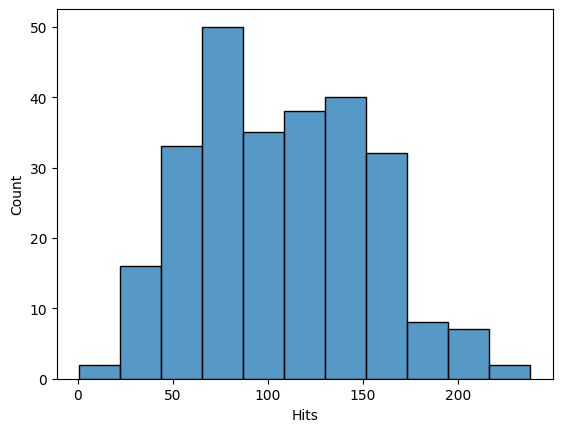

In [16]:
sns.histplot(X.Hits)

I'm going to take all my columns and normalize them so that each column has standard deviation 1. I'll do this using the `Normalizer` command for reasons that will be helpful later when I want to fix this. 

In [17]:
from sklearn.preprocessing import StandardScaler

In [20]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\uzair\appdata\local\programs\python\python39\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: sentence-transformers


In [18]:
# First we set up the transformer to figure out what has to happen 
# to each column to get out normalized data
transformer = StandardScaler().fit(X)

# This command tells the transformer I want a pandas data frame back
# otherwise it will hand me a numpy array.
transformer.set_output(transform = 'pandas')

#Then I actually use the transform bit to do the action on all the columns. 
X_norm = transformer.transform(X)

X_norm.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,1.221499,-0.523191,0.213352,1.058758,0.981166,1.075052
2,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,2.109109,-0.253863,0.819964,-0.944503,0.981166,-0.930187
3,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-0.324661,-0.744179,-0.848219,1.058758,-1.019196,1.075052
4,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,1.840678,-0.543909,-0.696566,1.058758,-1.019196,1.075052
5,1.294712,1.358167,-0.871783,0.755349,-0.018840,-0.282057,0.770868,0.766993,0.634985,-0.612370,0.422846,0.017294,-0.251434,-0.031177,2.087225,2.488147,-0.944503,0.981166,-0.930187


Woohoo, I have normalized data! 

In [21]:
np.std(X_norm)

AtBat          1.0
Hits           1.0
HmRun          1.0
Runs           1.0
RBI            1.0
Walks          1.0
Years          1.0
CAtBat         1.0
CHits          1.0
CHmRun         1.0
CRuns          1.0
CRBI           1.0
CWalks         1.0
PutOuts        1.0
Assists        1.0
Errors         1.0
League_N       1.0
Division_W     1.0
NewLeague_N    1.0
dtype: float64

Notice that the shape of the `Hits` histogram is the same, we've just scaled the $x$-axis. 

<AxesSubplot: xlabel='Hits', ylabel='Count'>

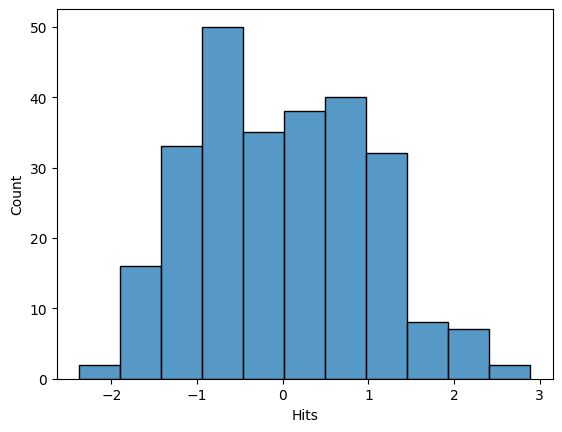

In [22]:
sns.histplot(X_norm.Hits)

# Ridge Regression

In class, we learned that doing ridge regression means that we try to find the best model accoding to the score
$$
RSS + \lambda \sum_{i} \beta_i^2.
$$
The good news is that `scikitlearn` has a built in `Ridge` function.  

- [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [User guide](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

In [23]:
from sklearn.linear_model import Ridge

The bad (ok, not honestly that bad) news is that they call their $\lambda$ parameter $\alpha$. So we're just going to minimize 
$$
RSS + \alpha \sum_{i} \beta_i^2.
$$
instead. So if I pick an $\alpha$ value, I can do ridge regression as follows.

In [24]:
a = 1 #<------ this is me picking an alpha value
ridge = Ridge(alpha = a) 

# normalize the input
transformer = StandardScaler().fit(X)
transformer.set_output(transform = 'pandas')
X_norm = transformer.transform(X)

# Fit the regression
ridge.fit(X_norm, y)

# Get all the coefficients
print('intercept:', ridge.intercept_)
print('\n')
print(pd.Series(ridge.coef_, index = X_norm.columns))
print('\nTraining MSE:',mean_squared_error(y,ridge.predict(X_norm)))

intercept: 535.9258821292775


AtBat         -270.475498
Hits           296.561904
HmRun           18.163896
Runs           -29.404568
RBI             -9.216376
Walks          124.440299
Years          -38.692079
CAtBat        -225.356627
CHits          126.900236
CHmRun          39.080440
CRuns          320.210409
CRBI           160.369861
CWalks        -184.494387
PutOuts         78.609505
Assists         47.446457
Errors         -23.763768
League_N        31.018874
Division_W     -60.246288
NewLeague_N    -13.674023
dtype: float64

Training MSE: 92485.34821665555


That is a bit annoying in terms of how much stuff I have to do, so here's some code that does the exact same thing (note that your score and coefficients learned are exactly the same as above). 

In [25]:
from sklearn.pipeline import make_pipeline

a = 1 #<------ this is me picking an alpha value


# The make_pipeline command takes care of the normalization and the 
# Ridge regression for you. Note that I am passing in the un-normalized
# matrix X everywhere in here, since the normalization happens internally.
model = make_pipeline(StandardScaler(), Ridge(alpha = a))
model.fit(X, y)
 
# Get all the coefficients. Notice that in order to get 
# them out of the ridge portion, we have to ask the pipeline 
# for the specific bit we want with the model.named_steps['ridge']
# in place of just ridge from above.
print('intercept:', model.named_steps['ridge'].intercept_)
print('\n')
print(pd.Series(model.named_steps['ridge'].coef_, index = X.columns))
print('\nTraining MSE:',mean_squared_error(y,model.predict(X)))

intercept: 535.9258821292775


AtBat         -270.475498
Hits           296.561904
HmRun           18.163896
Runs           -29.404568
RBI             -9.216376
Walks          124.440299
Years          -38.692079
CAtBat        -225.356627
CHits          126.900236
CHmRun          39.080440
CRuns          320.210409
CRBI           160.369861
CWalks        -184.494387
PutOuts         78.609505
Assists         47.446457
Errors         -23.763768
League_N        31.018874
Division_W     -60.246288
NewLeague_N    -13.674023
dtype: float64

Training MSE: 92485.34821665555


Of course, that was just me picking a random $\alpha$ out of a hat so there's no reason to trust that it's a good one. I could sit here all day and move that $\alpha$ around to see what's going on, but why do that, when I can make a for loop!

Here's a pile of $\alpha$s for us to test on.

In [26]:
alphas = 10**np.linspace(4,-2,100)*0.5
alphas = np.append(alphas,0)
alphas

array([5.00000000e+03, 4.34874501e+03, 3.78231664e+03, 3.28966612e+03,
       2.86118383e+03, 2.48851178e+03, 2.16438064e+03, 1.88246790e+03,
       1.63727458e+03, 1.42401793e+03, 1.23853818e+03, 1.07721735e+03,
       9.36908711e+02, 8.14875417e+02, 7.08737081e+02, 6.16423370e+02,
       5.36133611e+02, 4.66301673e+02, 4.05565415e+02, 3.52740116e+02,
       3.06795364e+02, 2.66834962e+02, 2.32079442e+02, 2.01850863e+02,
       1.75559587e+02, 1.52692775e+02, 1.32804389e+02, 1.15506485e+02,
       1.00461650e+02, 8.73764200e+01, 7.59955541e+01, 6.60970574e+01,
       5.74878498e+01, 5.00000000e+01, 4.34874501e+01, 3.78231664e+01,
       3.28966612e+01, 2.86118383e+01, 2.48851178e+01, 2.16438064e+01,
       1.88246790e+01, 1.63727458e+01, 1.42401793e+01, 1.23853818e+01,
       1.07721735e+01, 9.36908711e+00, 8.14875417e+00, 7.08737081e+00,
       6.16423370e+00, 5.36133611e+00, 4.66301673e+00, 4.05565415e+00,
       3.52740116e+00, 3.06795364e+00, 2.66834962e+00, 2.32079442e+00,
      

First off, let's take a look at how the coefficients learned change for various choices of $\alpha$. 

Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix coefs. In this case, it is a  19×100  matrix, with 19 rows (one for each predictor) and 100 columns (one for each value of alpha). 



In [31]:
from sklearn.pipeline import make_pipeline

ridge = Ridge()
coefs = []

for a in alphas:
    model = make_pipeline(StandardScaler(), Ridge(alpha = a))
    model.fit(X, y)
    coefs.append(model.named_steps['ridge'].coef_)
    

coefs = pd.DataFrame(coefs,columns = X_norm.columns)
coefs.head()
   

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,6.780624,7.846413,5.668981,7.382901,7.739614,7.908231,6.536754,8.894638,9.417447,8.959603,9.653524,9.732533,8.177650,5.941721,0.482213,-0.198173,0.147069,-4.066839,0.260218
1,7.482871,8.711141,6.222836,8.176418,8.547140,8.775630,7.167294,9.803256,10.402015,9.888785,10.662606,10.750886,8.995532,6.681835,0.538299,-0.238435,0.221313,-4.609158,0.332227
2,8.221672,9.637282,6.796229,9.020407,9.399342,9.703560,7.819084,10.758248,11.443720,10.869669,11.730158,11.828595,9.849605,7.497878,0.598915,-0.287508,0.315973,-5.215881,0.420140
3,8.991208,10.622778,7.382157,9.911172,10.290649,10.689638,8.484413,11.752906,12.537320,11.896678,12.850766,12.960326,10.732098,8.394523,0.664011,-0.347297,0.434733,-5.892882,0.526287
4,9.784056,11.664507,7.972138,10.843736,11.213981,11.730347,9.154123,12.779016,13.676264,12.962918,14.017662,14.139408,11.633564,9.376262,0.733471,-0.420043,0.581480,-6.646198,0.652960


Let's say I just want to look at the coefficient for the `Hits` column. 


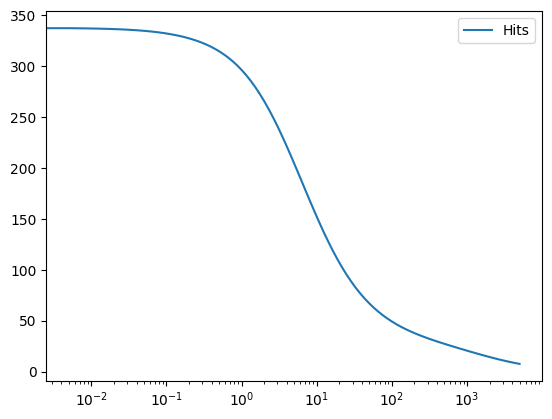

In [32]:
plt.plot(alphas,coefs.Hits, label = 'Hits')
plt.xscale('log')

plt.legend()

Or just for the `Runs` column.

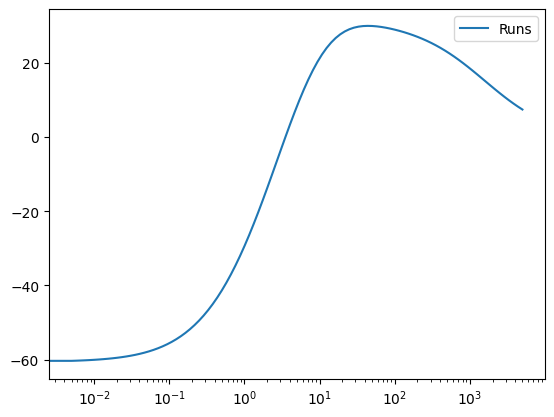

In [29]:
plt.plot(alphas,coefs.Runs, label = 'Runs')
plt.xscale('log')

plt.legend()

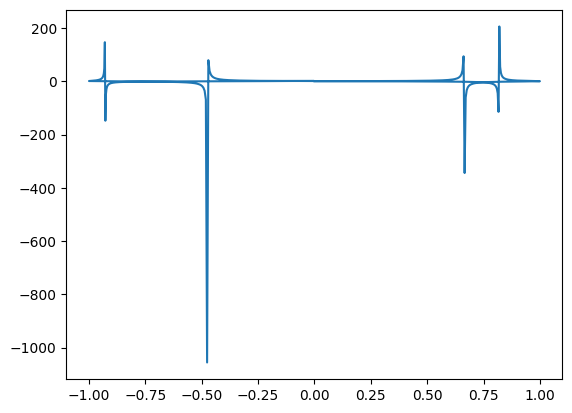

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# plot a parametric function

t = np.arange(0.0, 1.0, 0.001)

x = np.sin(2*np.pi*t)

y = np.tan(4*np.pi*t+t)

plt.plot(x,y)



But that's pretty annoying, so instead we look at all of the coefficients at once. 

In [13]:
alphas.shape, coefs.shape, coefs.columns.shape
coefs, alphas

NameError: name 'alphas' is not defined

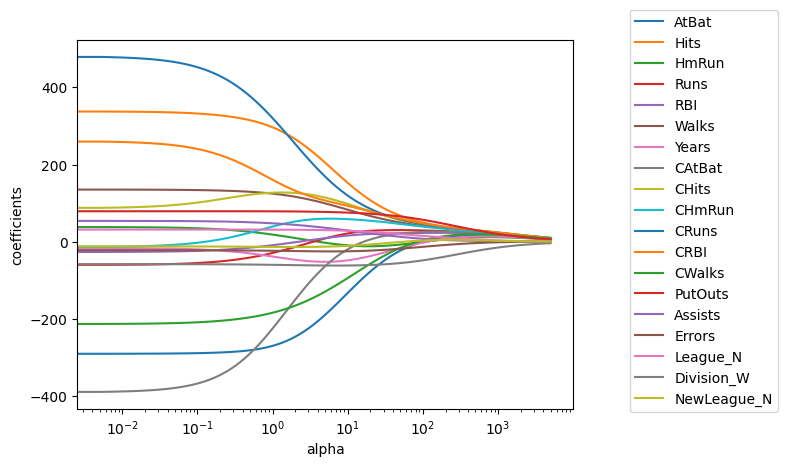

In [30]:



plt.plot(alphas, coefs, label = coefs.columns)


plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficients')

plt.legend(bbox_to_anchor = (1.1,1.1))


&#9989; **<font color=red>Q:</font>** There are two variables that have higher magnitude than the rest for low $\alpha$s (read: are either very large positive or very large negative). Which two are they from the data set? Which is which?


In [51]:
np.abs(coefs.loc[100]).sort_values(ascending = False)[:2]

CRuns     480.747135
CAtBat    391.038655
Name: 100, dtype: float64

## Train/test split version


Now we can start setting up the usual train/test splits to have at least a starting idea of how the testing error is going. The `random_state=1` bit just makes it so that everyone should get the same random split. 

In [56]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


&#9989; **<font color=red>Do this:</font>** Train a model using ridge regression with $\alpha = 4$. What is the MSE of your model on the testing set?

In [60]:
# Your code here #

model = make_pipeline(StandardScaler(), Ridge(alpha = 4))

model.fit(X_train, y_train)

print('Test MSE:',mean_squared_error(y_test,model.predict(X_test)))



Test MSE: 125020.36489978817



&#9989; **<font color=red>Do this:</font>** Ha ha nah, you can do better than that.  Lets try all our alphas and take a look at the testing MSE to make a better decision about what $\alpha$ we might want. Modify the code below to plot your testing MSE for all the alphas. What $\alpha$ should we use to train the model?

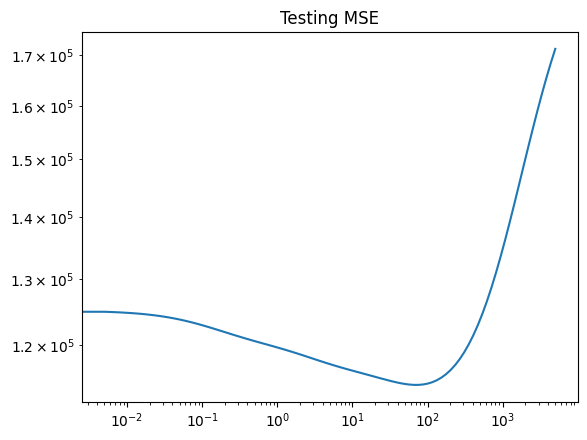

In [59]:
# Modify your code from above and add it in the for loop to plot the testing MSE

ridge = Ridge()
errors = []

for a in alphas:
    # ==== Your code goes in here ==== #
    model = make_pipeline(StandardScaler(), Ridge(alpha = a))
    model.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test,model.predict(X_test)))

#---plotting----

plt.plot(alphas,errors)
plt.title('Testing MSE')
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')



## RidgeCV

Whelp, your meanie professor didn't tell you that there's actually a built in function to do this for you (sorry-not-sorry). Aren't you glad you didn't read ahead?


In [69]:
from sklearn.linear_model import RidgeCV

- [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)
- [User Guide](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Basically, `RidgeCV` runs LOOCV (unless you tell it otherwise, see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)) on all the $\alpha$ values you specify on an input array, and tells you the best $\alpha$ given that. 

First, I am going to normalize. I'm being careful to not just normalize all of $X$ and then pass this matrix on since this is an example of [data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage-during-pre-processing). In that version, we are using some amount of information about the testing data (in this case it is contributing to the normalization process) to affect something in our training process. So here's what we do instead. 

In [79]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# To make sure my normalization isn't snooping, I fit the transformer only 
# on the training set 
transformer = StandardScaler().fit(X_train)
# transformer.set_output(transform = 'pandas')
# X_train_norm = transformer.transform(X_train)

# but in order for my output results to make sense, I have to apply the same 
# transformation to the testing set. 
X_test_norm = transformer.transform(X_test)

In [80]:
# I'm going to drop that 0 from the alphas because it makes 
# RidgeCV cranky
alphas = alphas[:-1]


ridgecv = RidgeCV(alphas = alphas, 
                  scoring = 'neg_mean_squared_error', 
                  )
ridgecv.fit(X_train_norm, y_train)



print('alpha chosen is', ridgecv.alpha_)

alpha chosen is 1.5269277544167077


I can predict my values on the test set directly from the `ridgecv` model we just built. 

In [81]:
pred = ridgecv.predict(X_test_norm)
mean_squared_error(y_test,pred)

ridgecv.alpha_

c:\Users\uzair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


1.5269277544167077

This is exactly the same result as if I went and retrained my model using the chosen $\alpha$ using `Ridge`. 

In [73]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train_norm, y_train)
mean_squared_error(y_test, ridge.predict(X_test_norm))

119116.38145414066

&#9989; **<font color=red>Do this:</font>** Why did we get a different best choice of $\alpha$ than we found in the previous section? 

*Your answer here*



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.